<a href="https://colab.research.google.com/github/EmodioAI/model-development/blob/main/Emotion_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries imports**

In [8]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot  as plt 
import shutil

# **Loading datasets**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# RAVDESS dataset path
rav_path = "/content/drive/MyDrive/Dataset/Emotional Speech Audio/RAVDESS"

# CREMA-D dataset path
crema_path = "/content/drive/MyDrive/Dataset/Emotional Speech Audio/CREMA-D"

# SAVEE dataset path
savee_path = "/content/drive/MyDrive/Dataset/Emotional Speech Audio/SAVEE/AllAudios"

# **RAVDESS**

In [ ]:
# stimulus characteristics
modality =["full-AV", 'video-only', "audio-only"]
vocal_channel=['speech', 'song']
emotion = [ 'neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']
emotional_intensity =['normal', 'strong'] 
statement =[ "Kids are talking by the door",  "Dogs are sitting by the door"]
repetition =["1st repetition","2nd repetition"]


In [ ]:

# create an empty list to store the stimulus characteristics
data_list = []

# loops through folder for all audio files
for fldr in os.listdir(rav_path):
    sub_folder_path = os.path.join(rav_path, fldr)
    for audio_file in os.listdir(sub_folder_path):
        file_path = os.path.join(sub_folder_path, audio_file)

        # numerical identifiers for stimulus characters 
        numerical_identifiers = audio_file.split('.')[0].split('-')

        # create a dictionary of stimulus characteristics for this audio file
        data_dict = {}
        data_dict['file_path']= file_path
        data_dict['modality'] = modality[int(numerical_identifiers[0])-1]
        data_dict['vocal_channel'] = vocal_channel[int(numerical_identifiers[1])-1]
        data_dict['emotion'] = emotion[int(numerical_identifiers[2])-1]
        if emotional_intensity[int(numerical_identifiers[3])-1] == 'normal':
            data_dict['emotional_intensity'] = 2
        else:
            data_dict['emotional_intensity'] = 3
        data_dict['statement'] = statement[int(numerical_identifiers[4])-1]
        data_dict['repetition'] = repetition[int(numerical_identifiers[5])-1]
        if int(numerical_identifiers[6]) % 2 ==0:
          data_dict['actor'] = 'female'
        else:
          data_dict['actor'] = 'male'
        
        # append the dictionary to the list
        data_list.append(data_dict)

In [ ]:
rav_dataset = pd.DataFrame(data_list)

In [ ]:
rav_dataset.head(10)

,file_path,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor
0,/content/drive/MyDrive/Dataset/Emotional Speec...,audio-only,speech,calm,3,Kids are talking by the door,2nd repetition,female
1,/content/drive/MyDrive/Dataset/Emotional Speec...,audio-only,speech,calm,3,Kids are talking by the door,1st repetition,female
2,/content/drive/MyDrive/Dataset/Emotional Speec...,audio-only,speech,calm,3,Dogs are sitting by the door,2nd repetition,female
3,/content/drive/MyDrive/Dataset/Emotional Speec...,audio-only,speech,happy,2,Dogs are sitting by the door,1st repetition,female
4,/content/drive/MyDrive/Dataset/Emotional Speec...,audio-only,speech,happy,3,Kids are talking by the door,1st repetition,female
5,/content/drive/MyDrive/Dataset/Emotional Speec...,audio-only,speech,neutral,2,Kids are talking by the door,2nd repetition,female
6,/content/drive/MyDrive/Dataset/Emotional Speec...,audio-only,speech,calm,2,Dogs are sitting by the door,2nd repetition,female
7,/content/drive/MyDrive/Dataset/Emotional Speec...,audio-only,speech,neutral,2,Kids are talking by the door,1st repetition,female
8,/content/drive/MyDrive/Dataset/Emotional Speec...,audio-only,speech,happy,3,Kids are talking by the door,2nd repetition,female
9,/content/drive/MyDrive/Dataset/Emotional Speec...,audio-only,speech,happy,2,Dogs are sitting by the door,2nd repetition,female


In [ ]:
rav_dataset = rav_dataset[['file_path','emotion','emotional_intensity']]
rav_dataset

,file_path,emotion,emotional_intensity
0,/content/drive/MyDrive/Dataset/Emotional Speec...,calm,3
1,/content/drive/MyDrive/Dataset/Emotional Speec...,calm,3
2,/content/drive/MyDrive/Dataset/Emotional Speec...,calm,3
3,/content/drive/MyDrive/Dataset/Emotional Speec...,happy,2
4,/content/drive/MyDrive/Dataset/Emotional Speec...,happy,3
...,...,...,...
1435,/content/drive/MyDrive/Dataset/Emotional Speec...,angry,3
1436,/content/drive/MyDrive/Dataset/Emotional Speec...,disgust,2
1437,/content/drive/MyDrive/Dataset/Emotional Speec...,fearful,3
1438,/content/drive/MyDrive/Dataset/Emotional Speec...,surprised,3


# **CREMA-D**

In [ ]:
# stimulus characteristics
emotion = {'NEU':'neutral','HAP': 'happy', 'SAD':'sad', 'ANG':'angry', 'FEA':'fearful','DIS': 'disgust'}
emotional_intensity ={'LO':1, 'MD':2, 'HI':3,'XX':2,'XX (1)':1,'X':1}

In [ ]:

# create an empty list to store files
crema_data_list = []

# loops through folder for all audio files

for audio_file in os.listdir(crema_path):
    file_path = os.path.join(crema_path, audio_file)

    # identifiers for stimulus characters 
    identifiers = audio_file.split('.')[0].split('_')
    # print(identifiers)

    # create a dictionary of stimulus characteristics for this audio file
    data_dict = {}
    data_dict['file_path']= file_path
 
    data_dict['emotion'] = emotion[identifiers[2]]
    data_dict['emotional_intensity'] = emotional_intensity[identifiers[3]]
  
    
    # append the dictionary to the list
    crema_data_list.append(data_dict)

In [ ]:
crema_dataset = pd.DataFrame(crema_data_list)
crema_dataset

,file_path,emotion,emotional_intensity
0,/content/drive/MyDrive/Dataset/Emotional Speec...,angry,2
1,/content/drive/MyDrive/Dataset/Emotional Speec...,fearful,2
2,/content/drive/MyDrive/Dataset/Emotional Speec...,fearful,2
3,/content/drive/MyDrive/Dataset/Emotional Speec...,happy,2
4,/content/drive/MyDrive/Dataset/Emotional Speec...,neutral,2
...,...,...,...
7438,/content/drive/MyDrive/Dataset/Emotional Speec...,angry,2
7439,/content/drive/MyDrive/Dataset/Emotional Speec...,fearful,2
7440,/content/drive/MyDrive/Dataset/Emotional Speec...,disgust,2
7441,/content/drive/MyDrive/Dataset/Emotional Speec...,neutral,2


# **SAVEE**

In [ ]:
# stimulus characteristics
emotion = {'n':'neutral', 'h':'happy', 'sa':'sad', 'a':'angry','f': 'fearful', 'd':'disgust','su': 'surprised'}

In [ ]:

# create an empty list to store the stimulus characteristics
savee_data_list = []

# loops through folder for all audio files
for fldr in os.listdir(savee_path):
    sub_folder_path = os.path.join(savee_path, fldr)
    for audio_file in os.listdir(sub_folder_path):
        file_path = os.path.join(sub_folder_path, audio_file)

        # numerical identifiers for stimulus characters 
        identifiers = list(audio_file.split('.')[0])

        # create a dictionary of stimulus characteristics for this audio file
        data_dict = {}
  
        data_dict['file_path']=file_path
        data_dict['emotion'] = emotion["".join(identifiers[:-2])]
        data_dict['emotional_intensity'] = 2

        # append the dictionary to the list
        savee_data_list.append(data_dict)

In [ ]:
savee_dataset = pd.DataFrame(savee_data_list)
savee_dataset

,file_path,emotion,emotional_intensity
0,/content/drive/MyDrive/Dataset/Emotional Speec...,angry,2
1,/content/drive/MyDrive/Dataset/Emotional Speec...,angry,2
2,/content/drive/MyDrive/Dataset/Emotional Speec...,angry,2
3,/content/drive/MyDrive/Dataset/Emotional Speec...,angry,2
4,/content/drive/MyDrive/Dataset/Emotional Speec...,angry,2
...,...,...,...
475,/content/drive/MyDrive/Dataset/Emotional Speec...,neutral,2
476,/content/drive/MyDrive/Dataset/Emotional Speec...,neutral,2
477,/content/drive/MyDrive/Dataset/Emotional Speec...,neutral,2
478,/content/drive/MyDrive/Dataset/Emotional Speec...,neutral,2


# **Dataset Combination**

In [ ]:
dataset = pd.concat([rav_dataset,crema_dataset,savee_dataset],ignore_index=True)

In [ ]:
dataset.tail()

,file_path,emotion,emotional_intensity
9358,/content/drive/MyDrive/Dataset/Emotional Speec...,neutral,2
9359,/content/drive/MyDrive/Dataset/Emotional Speec...,neutral,2
9360,/content/drive/MyDrive/Dataset/Emotional Speec...,neutral,2
9361,/content/drive/MyDrive/Dataset/Emotional Speec...,neutral,2
9362,/content/drive/MyDrive/Dataset/Emotional Speec...,neutral,2


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9363 entries, 0 to 9362
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   file_path            9363 non-null   object
 1   emotion              9363 non-null   object
 2   emotional_intensity  9363 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 219.6+ KB


In [ ]:
# saving dataset
dataset.to_csv('data.csv')

# **Dataset Exploration**

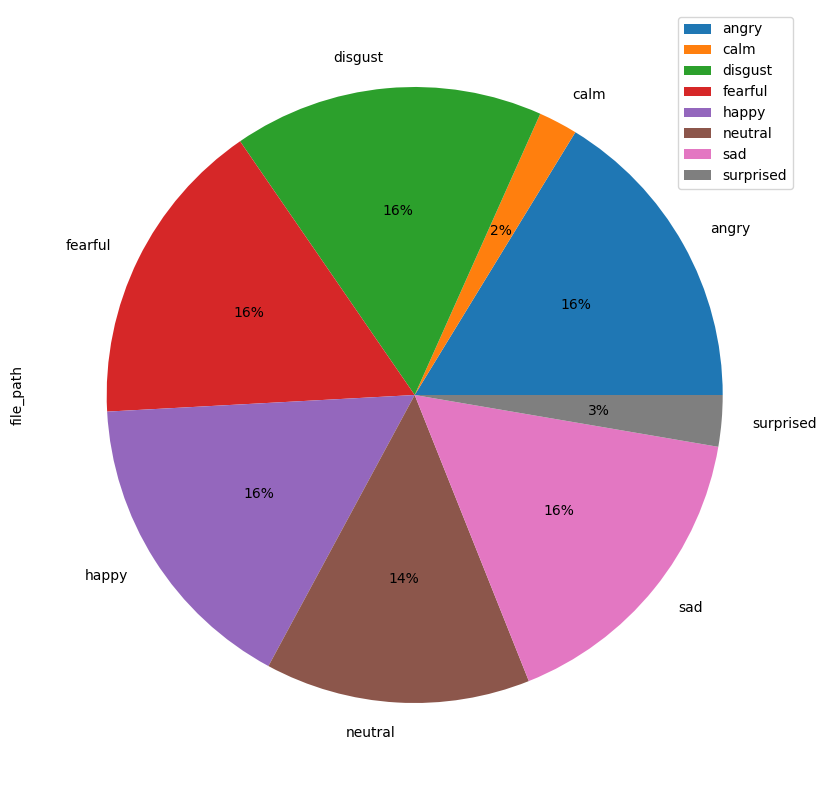

In [ ]:
# Plotting the pie chart for above dataframe
pie_chart=dataset.groupby(['emotion']).count().plot(kind='pie', y=0, autopct='%1.0f%%',figsize=(10,10))

In [ ]:
fig = pie_chart.get_figure()
fig.savefig("emotions_pie_chart.jpg")

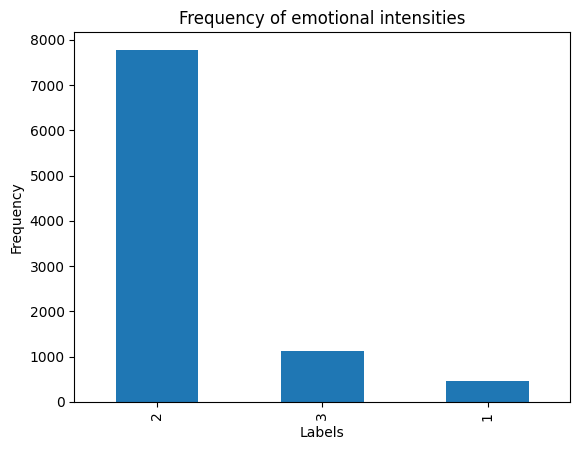

In [ ]:
# count emotional intensity
value_counts = dataset['emotional_intensity'].value_counts()

# Plot the data
ax = value_counts.plot(kind='bar')

# Add titles and labels
ax.set_title('Frequency of emotional intensities')
ax.set_xlabel('Labels')
ax.set_ylabel('Frequency')

# save plot
plt.savefig('emotional_intensity_bar_plot.jpg')

# Display the plot
plt.show()



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Audio Separation**

In [4]:
data = pd.read_csv('data.csv')

In [7]:
data['emotion'].unique()

array(['calm', 'happy', 'neutral', 'angry', 'surprised', 'disgust', 'sad',
       'fearful'], dtype=object)

In [9]:
base_folder_path ='/content/drive/MyDrive/Dataset/Emotional Speech Audio/Audios'
os.mkdir(base_folder_path)

In [15]:
for emotion in data['emotion'].unique():
  emotion_audio_path = f'{base_folder_path}/{emotion}'
  os.mkdir(emotion_audio_path)
  emotion_files_path = data.loc[data["emotion"] == emotion, "file_path"].tolist()

  for index,path in enumerate(emotion_files_path):
    shutil.copyfile(path, os.path.join(emotion_audio_path, f'{emotion}_{index}'))

  print(emotion,' copy done')

calm  copy done
happy  copy done
neutral  copy done
angry  copy done
surprised  copy done
disgust  copy done
sad  copy done
fearful  copy done
